In [1]:
# Program to test the bess function

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def bess(m_max,x) :
    # Bessel function
    # Inputs
    #    m_max = Largest desired order
    #    x = Value at which Bessel function J(x) is evaluated
    # Output
    #    jj = Vector of J(x) for all orders <= m_max

    #* Perform downward recursion from initial guess
    eps = 1.0e-15
    m_top = max(m_max,x)+15                # Top value of m for recursion
    m_top = int(2*np.ceil( m_top/2 ))      # Round up to an even number
    j = np.empty(m_top+1)
    j[m_top] = 0.
    j[m_top-1] = 1.
    for m in reversed(range(m_top-1)) :  # Downward recursion
        j[m] = 2.*(m+1)/(x+eps)*j[m+1] - j[m+2]

    #* Normalize using identity and return requested values
    norm = j[0]         
    for m in range(2,m_top,2) :
        norm = norm + 2*j[m]
    
    jj = np.empty(m_max+1)       # Send back only the values for
    for m in range(m_max+1) :    # m=0,...,m_max and discard values
        jj[m] = j[m]/norm        # for m=m_max+1,...,m_top
                                 
    return jj

In [3]:
def zeroj( m_order, n_zero) :
    # Zeros of the Bessel function J(x)
    # Inputs
    #   m_order = Order of the Bessel function
    #   n_zero  = Index of the zero (first, second, etc.)
    # Output
    #   z = The "n_zero th" zero of the Bessel function
    
    #* Use asymtotic formula for initial guess
    beta = (n_zero + 0.5*m_order - 0.25)*np.pi;
    mu = 4*m_order**2;
    z = beta - (mu-1.)/(8.*beta) - 4.*(mu-1)*(7.*mu-31.)/(3.*(8.*beta)**3);

    #* Use Newton's method to locate the root
    jj = np.empty(m_order+2)
    for i in range(5) :
        jj = bess(m_order+1,z)     
        # Use the recursion relation to evaluate derivative
        deriv = -jj[m_order+1] + m_order/z * jj[m_order]
        z = z - jj[m_order]/deriv   # Newton's root finding  
    
    return z

Enter m: 2


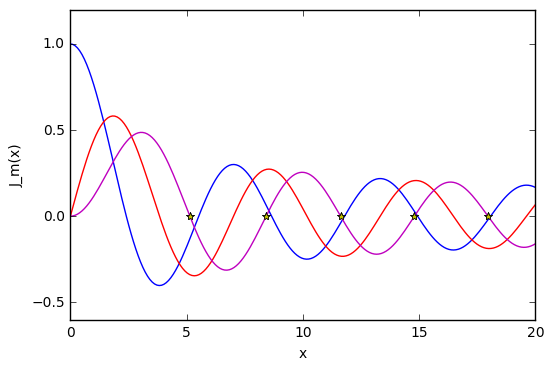

In [13]:
nplot = 200
xMax = 20.
m = input("Enter m: ")
x = np.linspace(0.,xMax,nplot)

jj = np.empty((nplot,m+1))
for i in range(nplot) :
    jj[i,:] = bess(m,x[i])
    
jZero = np.empty(20)
for i in range(20) :
    jZero[i] = zeroj(m,i+1)
    if jZero[i] > xMax  :
        break
nZeros = i    # Skip the zero that's > xMax
    
for mi in range(m+1) :
    plt.plot(x,jj[:,mi],'-',jZero[0:nZeros],np.zeros(nZeros),'*')
    plt.xlabel('x')
    plt.ylabel('J_m(x)')